In [1]:
import matplotlib.pyplot as plt

from scripts import tabular_baselines

import seaborn as sns
import numpy as np

from datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids
from scripts.tabular_baselines import *
from scripts.tabular_evaluation import evaluate
from scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from scripts import tabular_metrics
from scripts.transformer_prediction_interface import TabPFNClassifier

/anaconda/envs/tabpfn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from notebook_utils import *

In [3]:
%load_ext autoreload

%autoreload 2

# Datasets

In [4]:
cc_test_datasets_multiclass, cc_test_datasets_multiclass_df = load_openml_list(open_cc_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


Number of datasets: 30


In [5]:
from datasets import load_openml_list, open_cc_dids, open_cc_valid_dids, test_dids_classification

cc_valid_datasets_multiclass, cc_valid_datasets_multiclass_df = load_openml_list(open_cc_valid_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


Number of datasets: 149


In [6]:
def get_datasets(selector, task_type, suite='openml'):
    if task_type == 'binary':
        ds = valid_datasets_binary if selector == 'valid' else test_datasets_binary
    else:
        if suite == 'openml':
            ds = valid_datasets_multiclass if selector == 'valid' else test_datasets_multiclass
        elif suite == 'cc':
            ds = cc_valid_datasets_multiclass if selector == 'valid' else cc_test_datasets_multiclass
        else:
            raise Exception("Unknown suite")
    return ds

In [7]:
device = "cpu"
transformer_dict = {}
transformer_dict['Theirs ensemble 32'] =  TabPFNClassifier(device=device, N_ensemble_configurations=32)
transformer_dict['Theirs ensemble 4'] =  TabPFNClassifier(device=device, N_ensemble_configurations=4)
transformer_dict['Theirs ensemble 1'] =  TabPFNClassifier(device=device, N_ensemble_configurations=1)

model_string = "defaults_k_aggregate_2_batch_128_onehot_classes_multiclass_02_10_2023_23_55_16"
transformer_dict['Onehot 82 ensemble 32'] =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=32)
transformer_dict['Onehot 82 ensemble 4'] =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=4)
transformer_dict['Onehot 82 ensemble 1'] =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=1)

transformer_dict['batch64 67 ensemble 32'] = TabPFNClassifier(device=device, model_string="batch_64_aggregate_16_multiclass_02_01_2023_19_16_01", epoch=67, N_ensemble_configurations=32)
transformer_dict['batch64 67 ensemble 4'] = TabPFNClassifier(device=device, model_string="batch_64_aggregate_16_multiclass_02_01_2023_19_16_01", epoch=67, N_ensemble_configurations=4)
transformer_dict['batch64 67 ensemble 1'] = TabPFNClassifier(device=device, model_string="batch_64_aggregate_16_multiclass_02_01_2023_19_16_01", epoch=67, N_ensemble_configurations=1)

loading model from file models_diff/prior_diff_real_checkpoint_download_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_download_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_download_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_defaults_k_aggregate_2_batch_128_onehot_classes_multiclass_02_10_2023_23_55_16_n_0_epoch_82.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.83 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
loading model from file models_diff/prior_diff_real_checkpoint_defaults_k_aggregate_2

In [156]:
device = "cpu"
transformer_dict = {}
transformer_dict['n_layers_6 32'] =  TabPFNClassifier(device=device, model_string="nlayers_6_multiclass_02_13_2023_17_37_55", epoch=100,  N_ensemble_configurations=32)
transformer_dict['n_layers_6 4'] =  TabPFNClassifier(device=device, model_string="nlayers_6_multiclass_02_13_2023_17_37_55", epoch=100, N_ensemble_configurations=4)
transformer_dict['n_layers_6 1'] =  TabPFNClassifier(device=device, model_string="nlayers_6_multiclass_02_13_2023_17_37_55", epoch=100, N_ensemble_configurations=1)

loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_multiclass_02_13_2023_17_37_55_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 13.21 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_multiclass_02_13_2023_17_37_55_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 13.21 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_multiclass_02_13_2023_17_37_55_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 13.21 M parameters


In [8]:
device = "cpu"
transformer_dict = {}
transformer_dict['feature mlp 32'] =  TabPFNClassifier(device=device, model_string="featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11", epoch=15,  N_ensemble_configurations=32)
transformer_dict['feature mlp 4'] =  TabPFNClassifier(device=device, model_string="featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11", epoch=15, N_ensemble_configurations=4)
transformer_dict['feature mlp 1'] =  TabPFNClassifier(device=device, model_string="featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11", epoch=15, N_ensemble_configurations=1)


loading model from file models_diff/prior_diff_real_checkpoint_featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11_n_0_epoch_15.cpkt
Loading model that can be used for inference only
Using a Transformer with 26.04 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11_n_0_epoch_15.cpkt
Loading model that can be used for inference only
Using a Transformer with 26.04 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_featurewise_mlp_hidden_512_multiclass_02_16_2023_20_33_11_n_0_epoch_15.cpkt
Loading model that can be used for inference only
Using a Transformer with 26.04 M parameters


In [8]:
device = "cpu"
transformer_dict = {}
transformer_dict['train longer 32'] =  TabPFNClassifier(device=device, model_string="retraining_batch_2048_lr0001", epoch=92,  N_ensemble_configurations=32)
transformer_dict['train longer 4'] =  TabPFNClassifier(device=device, model_string="retraining_batch_2048_lr0001", epoch=92, N_ensemble_configurations=4)
transformer_dict['train longer 1'] =  TabPFNClassifier(device=device, model_string="retraining_batch_2048_lr0001", epoch=92, N_ensemble_configurations=1)

loading model from file models_diff/prior_diff_real_checkpoint_retraining_batch_2048_lr0001_n_0_epoch_92.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.83 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_retraining_batch_2048_lr0001_n_0_epoch_92.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.83 M parameters
loading model from file models_diff/prior_diff_real_checkpoint_retraining_batch_2048_lr0001_n_0_epoch_92.cpkt
Loading model that can be used for inference only
Using a Transformer with 25.83 M parameters


In [65]:
device = "cuda"
transformer_dict = {}
transformer_dict['nlayer 6 emsize 256 32'] =  TabPFNClassifier(device=device, model_string="nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28", epoch=100,  N_ensemble_configurations=32)
transformer_dict['nlayer 6 emsize 256 4'] =  TabPFNClassifier(device=device, model_string="nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28", epoch=100, N_ensemble_configurations=4)
transformer_dict['nlayer 6 emsize 256 1'] =  TabPFNClassifier(device=device, model_string="nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28", epoch=100, N_ensemble_configurations=1)

loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 3.33 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 3.33 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_models_from_memory()
loading model from file models_diff/prior_diff_real_checkpoint_nlayers_6_emsize_256_onehot_multiclass_02_17_2023_02_32_28_n_0_epoch_100.cpkt
Loading model that can be used for inference only
Using a Transformer with 3.33 M parameters
Multiple models in memory. This might lead to memory issues. Consider calling remove_m

# Setting params

In [7]:
eval_positions = [1000]
max_features = 100
n_samples = 2000
selector = 'test'
base_path = os.path.join('.')
overwrite=False
max_times = [0.5, 1, 15, 30, 60, 60*5, 60*15, 60*60]
metric_used = tabular_metrics.auc_metric
methods = ['transformer', 'logistic', 'gp', 'knn', 'catboost', 'xgb', 'autosklearn2', 'autogluon']
task_type = 'multiclass'

In [8]:
suite = 'cc'
valid_datasets = get_datasets('valid',task_type, suite=suite)

In [9]:
from functools import partial
clf_dict = {name: partial(transformer_metric, classifier=clf) for name, clf in transformer_dict.items()}

NameError: name 'transformer_dict' is not defined

In [10]:
# clf_dict= {'gp': gp_metric
#                 , 'knn': knn_metric
#                 , 'catboost': catboost_metric
#                 , 'xgb': xgb_metric
#            , 'transformer': transformer_metric
#                 , 'logistic': logistic_metric
#            , 'autosklearn': autosklearn_metric
#              , 'autosklearn2': autosklearn2_metric
#             , 'autogluon': autogluon_metric}

In [11]:
from scripts.tabular_baselines import knn_metric, catboost_metric, transformer_metric, logistic_metric, xgb_metric
clf_dict= {#'gp': gp_metric
    'knn': knn_metric
                 , 'catboost': catboost_metric
                 , 'xgb': xgb_metric
            , 'transformer': transformer_metric
                 , 'logistic': logistic_metric}
#            , 'autosklearn': autosklearn_metric
#              , 'autosklearn2': autosklearn2_metric
#             , 'autogluon': autogluon_metric}

In [16]:
device = 'cuda'

def eval_method(task_type, method, dids, selector, eval_positions, max_time, metric_used, split_number, append_metric=True, fetch_only=False, verbose=False):
    
    dids = dids if type(dids) is list else [dids]
    
    for did in dids:

        ds = get_datasets(selector, task_type, suite=suite)

        ds = ds if did is None else ds[did:did+1]

        clf = clf_dict[method]

        time_string = '_time_'+str(max_time) if max_time else ''
        metric_used_string = '_'+tabular_baselines.get_scoring_string(metric_used, usage='') if append_metric else ''

        result = evaluate(datasets=ds
                          , model=clf
                          , method=method+time_string+metric_used_string
                          , n_samples=n_samples, base_path=base_path
                          , eval_positions=eval_positions
                          , device=device, max_splits=1
                          , overwrite=overwrite
                          , save=True
                          , metric_used=metric_used
                          , path_interfix=task_type
                          , fetch_only=fetch_only
                          , split_number=split_number
                          , verbose=verbose
                          , max_time=max_time)
    
    return result

# Baseline Evaluation
This section runs baselines and saves results locally.

In [71]:
!mkdir {base_path}/results
!mkdir {base_path}/results/tabular/
!mkdir {base_path}/results/tabular/multiclass/

mkdir: cannot create directory ‘./results’: File exists
mkdir: cannot create directory ‘./results/tabular/’: File exists
mkdir: cannot create directory ‘./results/tabular/multiclass/’: File exists


In [72]:
# RUN ONE METHOD ON ONE DATASET AND SPLIT
overwrite=True
dataset_id = 0
split_number = 1
maximum_runtime = 30
r = eval_method(task_type, 'Theirs ensemble 32', dataset_id, 'test', eval_positions, maximum_runtime, metric_used, split_number)

KeyError: 'Theirs ensemble 32'

In [12]:
methods = list(clf_dict.keys())
methods

['knn', 'catboost', 'xgb', 'transformer', 'logistic']

In [14]:
max_times = [0.5]

In [17]:
# RUN ALL METHODS, SPLITS AND DATASETS
test_datasets = get_datasets('test',task_type, suite=suite)

overwrite=True
jobs = [
    eval_method(task_type, m, did, selector, eval_positions, max_time, metric_used, split_number)
    for did in range(0, len(valid_datasets))
    for selector in ['valid']
    for m in methods
    for max_time in max_times
    for split_number in [1, 2, 3, 4, 5]
]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]


  0%|                                                                                                                                                                                                                                | 0/1000 [00:00<?, ?trial/s, best loss=?]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:01<?, ?it/s]



There was an exception in <function knn_metric at 0x7f9ff16ff8c0>
'numpy.random.mtrand.RandomState' object has no attribute 'integers'
Execution failed breast-cancer
Execution failed breast-cancer


Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]


  0%|                                                                                                                                                                                                                                | 0/1000 [00:00<?, ?trial/s, best loss=?]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]



There was an exception in <function knn_metric at 0x7f9ff16ff8c0>
'numpy.random.mtrand.RandomState' object has no attribute 'integers'
Execution failed breast-cancer
Execution failed breast-cancer


Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]


  0%|                                                                                                                                                                                                                                | 0/1000 [00:00<?, ?trial/s, best loss=?]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]



There was an exception in <function knn_metric at 0x7f9ff16ff8c0>
'numpy.random.mtrand.RandomState' object has no attribute 'integers'
Execution failed breast-cancer
Execution failed breast-cancer


Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]


  0%|                                                                                                                                                                                                                                | 0/1000 [00:00<?, ?trial/s, best loss=?]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:01<?, ?it/s]



There was an exception in <function knn_metric at 0x7f9ff16ff8c0>
'numpy.random.mtrand.RandomState' object has no attribute 'integers'
Execution failed breast-cancer
Execution failed breast-cancer


Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]


  0%|                                                                                                                                                                                                                                | 0/1000 [00:00<?, ?trial/s, best loss=?]

Calculating splits<function knn_metric at 0x7f9ff16ff8c0> 143:   0%|                                                                                                                                                                                    | 0/1 [00:00<?, ?it/s]



There was an exception in <function knn_metric at 0x7f9ff16ff8c0>
'numpy.random.mtrand.RandomState' object has no attribute 'integers'
Execution failed breast-cancer
Execution failed breast-cancer


Calculating splits<function catboost_metric at 0x7f9ff16ff710> 143:   0%|                                                                                                                                                                               | 0/1 [00:01<?, ?it/s]


KeyboardInterrupt: 

Bad pipe message: %s [b'j\xc6\xc6\xe2\x03\xe2R\xb7\x06\xfbu\xec\xd6L(:\xfe\x83 )t\xf4\xe7\x98J\x14\x04\xfa\xb0\xb7\x19\x9a\xae\xd6,b#\xca\xff<X\x852\xa20\xda\xac\x16\xd5\xbe\xdc\x00\x08\x13\x02\x13\x03']
Bad pipe message: %s [b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\xeb\xaf$\x9f\x89\x0b\xcc\xc7l,\xae\xf8\x82\xa7\xae\x97\xf3\\ \x80\xb7Q\xc3\xbf\xb6\xf2\xea3\xb4?!n[\xdb\xd8\xd3\xc2\xd70H)\xeb\xde9\xc2\x19\xc6\x8f\x14&\xdd\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00', b'\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01

In [32]:
len(jobs)

54000

In [ ]:
configs = [(m, did, split_number, max_time)
    for did in range(0, len(valid_datasets))
    for selector in ['valid']
    for m in methods
    for max_time in max_times
    for split_number in [1, 2, 3, 4, 5]
]

In [ ]:
len(jobs)

In [33]:
len(configs)

54000

In [36]:
results_retry = [(m, did, split_number, max_time, float(job['mean_metric'])) for (m,  did, split_number, max_time), job in zip(configs, jobs)]

In [37]:
results_retry = pd.DataFrame(results_retry, columns=['model', 'did', 'split', 'max_time', 'roc'])

In [42]:
results_retry

,model,did,split,max_time,roc
0,Theirs ensemble 32,0,1,0.5,0.685589
1,Theirs ensemble 32,0,2,0.5,0.687642
2,Theirs ensemble 32,0,3,0.5,0.630576
3,Theirs ensemble 32,0,4,0.5,0.777140
4,Theirs ensemble 32,0,5,0.5,0.723577
...,...,...,...,...,...
53995,batch64 67 ensemble 1,149,1,3600.0,0.872013
53996,batch64 67 ensemble 1,149,2,3600.0,0.878277
53997,batch64 67 ensemble 1,149,3,3600.0,0.867903
53998,batch64 67 ensemble 1,149,4,3600.0,0.879317


In [44]:
results_only_one_time = results_retry[results_retry.max_time == 3600]

In [45]:
results_only_one_time.to_csv("results_only_one_time.csv")

In [40]:
results_retry.to_csv("results_retry_add_max_time.csv")

In [82]:
results_l6_em256.to_csv("results_l6_em256.csv")

In [28]:
results_nl6 = pd.read_csv("n_layers_6_comparison.csv", index_col=0)

In [32]:
df = pd.read_csv("ensemble_comparison.csv", index_col=0)

In [ ]:
df.did.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [33]:
df_base = pd.read_csv("results_baseline_time_05.csv", index_col=0)

In [46]:
df_combined = results_only_one_time

In [47]:
df_combined.model.unique()

array(['Theirs ensemble 32', 'Theirs ensemble 4', 'Theirs ensemble 1',
       'Onehot 82 ensemble 32', 'Onehot 82 ensemble 4',
       'Onehot 82 ensemble 1', 'batch64 67 ensemble 32',
       'batch64 67 ensemble 4', 'batch64 67 ensemble 1'], dtype=object)

In [48]:
mean_across_splits = df_combined.groupby(["model", "did"]).roc.mean()

In [49]:
mean_across_splits

model                  did
Onehot 82 ensemble 1   0      0.698383
                       1      0.742486
                       2      0.998105
                       3      0.923819
                       4      0.913317
                                ...   
batch64 67 ensemble 4  145    0.958937
                       146    0.998454
                       147    0.981408
                       148    0.908643
                       149    0.871617
Name: roc, Length: 1350, dtype: float64

<AxesSubplot:xlabel='did', ylabel='roc'>

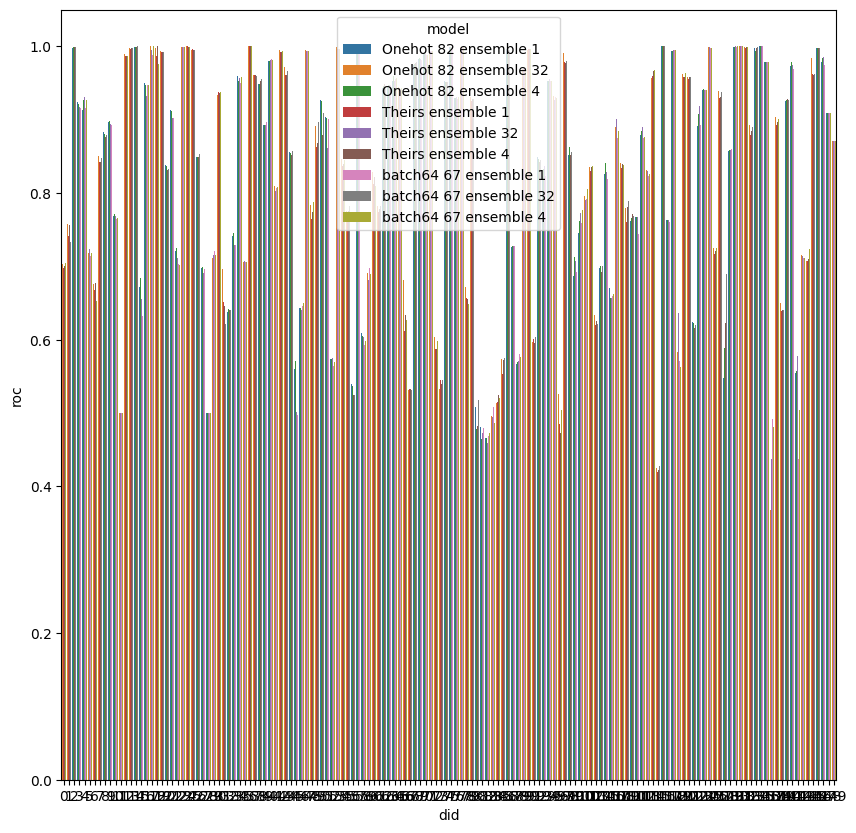

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.barplot(data=mean_across_splits.reset_index(), x="did", y="roc", hue="model")

In [51]:
mean_across_splits.reset_index()

,model,did,roc
0,Onehot 82 ensemble 1,0,0.698383
1,Onehot 82 ensemble 1,1,0.742486
2,Onehot 82 ensemble 1,2,0.998105
3,Onehot 82 ensemble 1,3,0.923819
4,Onehot 82 ensemble 1,4,0.913317
...,...,...,...
1345,batch64 67 ensemble 4,145,0.958937
1346,batch64 67 ensemble 4,146,0.998454
1347,batch64 67 ensemble 4,147,0.981408
1348,batch64 67 ensemble 4,148,0.908643


In [52]:
from scipy.stats import rankdata

In [53]:
matrix = mean_across_splits.unstack("model")
ranks = pd.DataFrame(rankdata(-matrix, axis=1), columns=matrix.columns)
ranks.mean()

model
Onehot 82 ensemble 1      5.046667
Onehot 82 ensemble 32     3.600000
Onehot 82 ensemble 4      4.230000
Theirs ensemble 1         6.753333
Theirs ensemble 32        4.726667
Theirs ensemble 4         5.496667
batch64 67 ensemble 1     5.943333
batch64 67 ensemble 32    4.273333
batch64 67 ensemble 4     4.930000
dtype: float64

In [54]:
matrix.mean()

model
Onehot 82 ensemble 1      0.821874
Onehot 82 ensemble 32     0.824872
Onehot 82 ensemble 4      0.823556
Theirs ensemble 1         0.817213
Theirs ensemble 32        0.821528
Theirs ensemble 4         0.820516
batch64 67 ensemble 1     0.817666
batch64 67 ensemble 32    0.822279
batch64 67 ensemble 4     0.820281
dtype: float64

In [55]:
matrix.median()

model
Onehot 82 ensemble 1      0.875101
Onehot 82 ensemble 32     0.875990
Onehot 82 ensemble 4      0.875871
Theirs ensemble 1         0.860362
Theirs ensemble 32        0.866025
Theirs ensemble 4         0.864614
batch64 67 ensemble 1     0.873334
batch64 67 ensemble 32    0.875752
batch64 67 ensemble 4     0.873842
dtype: float64

In [56]:
bla = mean_across_splits.reset_index()
bla.columns = ['classifier_name', 'dataset_name', 'accuracy']

In [66]:
bla.classifier_name.unique()

array(['Onehot 82 ensemble 1', 'Onehot 82 ensemble 32',
       'Onehot 82 ensemble 4', 'Theirs ensemble 1', 'Theirs ensemble 32',
       'Theirs ensemble 4', 'batch64 67 ensemble 1',
       'batch64 67 ensemble 32', 'batch64 67 ensemble 4', 'catboost',
       'gp', 'knn', 'logistic', 'transformer', 'xgb'], dtype=object)

In [73]:
pruned = bla[~bla.classifier_name.str.contains("batch64")]

0      15
16     15
1      15
28     15
27     15
       ..
64      9
63      9
62      9
61      9
149     9
Name: dataset_name, Length: 150, dtype: int64

['Onehot 82 ensemble 1' 'Onehot 82 ensemble 32' 'Onehot 82 ensemble 4'
 'Theirs ensemble 1' 'Theirs ensemble 32' 'Theirs ensemble 4'
 'batch64 67 ensemble 1' 'batch64 67 ensemble 32' 'batch64 67 ensemble 4']
Onehot 82 ensemble 1      21.0
Onehot 82 ensemble 32     34.0
Onehot 82 ensemble 4      16.0
Theirs ensemble 1          6.0
Theirs ensemble 32        16.0
Theirs ensemble 4          8.0
batch64 67 ensemble 1     14.0
batch64 67 ensemble 32    15.0
batch64 67 ensemble 4     10.0
dtype: float64
Theirs ensemble 1         6.753333
batch64 67 ensemble 1     5.943333
Theirs ensemble 4         5.496667
Onehot 82 ensemble 1      5.046667
batch64 67 ensemble 4     4.930000
Theirs ensemble 32        4.726667
batch64 67 ensemble 32    4.273333
Onehot 82 ensemble 4      4.230000
Onehot 82 ensemble 32     3.600000
dtype: float64
('Onehot 82 ensemble 32', 'Theirs ensemble 1', 2.2173392394946143e-15, True)
('Theirs ensemble 1', 'Theirs ensemble 32', 2.564275384805367e-12, True)
('Onehot 82 ensemb

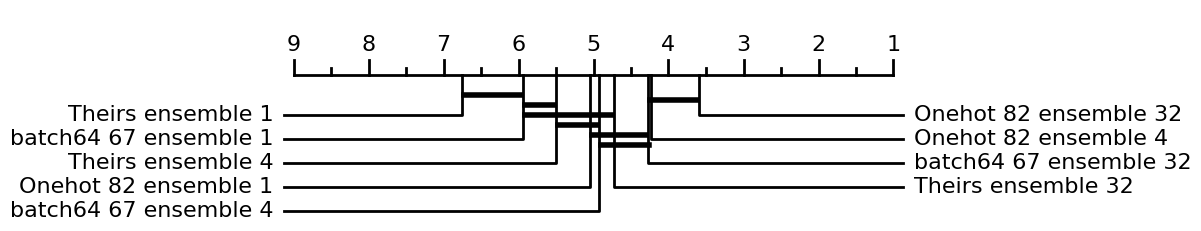

<Figure size 640x480 with 0 Axes>

Bad pipe message: %s [b'\xeb\xdc\x08\x17?\x00\xb7\x9e\x074\x9b&\xc7{\xf7\x05\xd6J \xb6\xfc\x8c\xd0_-\x8c\xba\xbd\x17\x8f\xcc\xfd\x0c\xe8\x8d\x18h\xfb\x1e\xfc\xc9y\x8eN\x81Z53s\xd1\x08\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01']
Bad pipe message: %s [b'\x122\xea']
Bad pipe message: %s [b"-a\xde\xbe\xb2:\xdd\xd7\xddf\xfc\xad\xdc\xb1EGe9\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x00", b'8\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00']
Bad pipe message: %s [b'\x0f\x89\xe0\x00\xf5P\x96p\x91\xdd%o\n;|\xf9oZ\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19

In [58]:
from scripts.critical_differences import draw_cd_diagram
res = draw_cd_diagram(bla, title="OVO ROC AUC")
plt.show()
plt.savefig("comparison_correct_aggregate.png")

In [135]:
wins = pd.DataFrame(index=matrix.columns, columns=matrix.columns, dtype=float)
for c, d in itertools.product(matrix.columns, repeat=2):
    wins.loc[c, d] = (matrix[c].round(3) > matrix [d].round(3)).mean()

In [136]:
wins

model,Onehot 82 ensemble 1,Onehot 82 ensemble 32,Onehot 82 ensemble 4,Theirs ensemble 1,Theirs ensemble 32,Theirs ensemble 4,batch64 67 ensemble 1,batch64 67 ensemble 32,batch64 67 ensemble 4
model,,,,,,,,,
Onehot 82 ensemble 1,0.000000,0.213333,0.240000,0.613333,0.413333,0.466667,0.593333,0.360000,0.413333
Onehot 82 ensemble 32,0.593333,0.000000,0.473333,0.753333,0.540000,0.593333,0.646667,0.506667,0.540000
Onehot 82 ensemble 4,0.500000,0.240000,0.000000,0.706667,0.486667,0.526667,0.606667,0.446667,0.493333
Theirs ensemble 1,0.273333,0.133333,0.186667,0.000000,0.153333,0.160000,0.300000,0.166667,0.206667
Theirs ensemble 32,0.413333,0.260000,0.300000,0.693333,0.000000,0.466667,0.520000,0.280000,0.386667
Theirs ensemble 4,0.393333,0.240000,0.333333,0.633333,0.206667,0.000000,0.493333,0.200000,0.313333
batch64 67 ensemble 1,0.280000,0.220000,0.240000,0.506667,0.293333,0.286667,0.000000,0.193333,0.233333
batch64 67 ensemble 32,0.500000,0.306667,0.346667,0.673333,0.433333,0.526667,0.606667,0.000000,0.433333
batch64 67 ensemble 4,0.420000,0.253333,0.293333,0.620000,0.340000,0.420000,0.546667,0.233333,0.000000


In [59]:
!hostname

amueller-tabpfn-4gpu


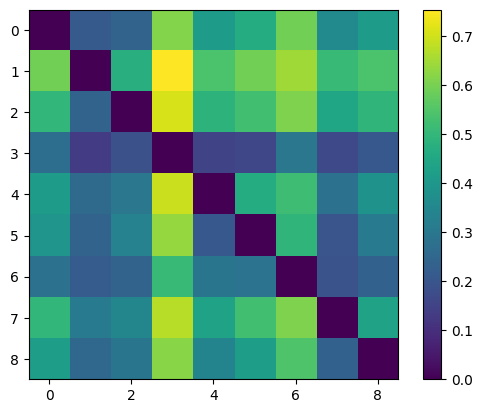

In [149]:
plt.imshow(wins)
plt.colorbar()

<AxesSubplot:xlabel='model', ylabel='model'>

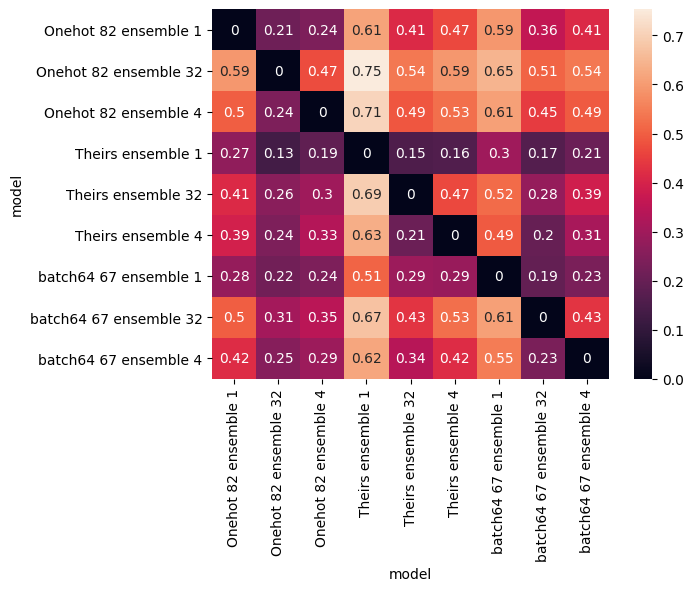

Bad pipe message: %s [b"\x8e\xea\xcdV\xae\xa9dmp~>\x83\xb2\xf2[\xac\xf4\xbb\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03", b'\x03\x03']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x02\xf7\xf5H\x10\xa8\x11\x07H\x92a\x8d"^\xcb\x969\xcb\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\

In [151]:
sns.heatmap(wins, annot=True)

In [145]:
sns.boxplot(data=mean_across_splits.reset_index(), x="roc", y="model")

<Axes:xlabel='roc', ylabel='model'>

# Comparison

In [ ]:
pos = str(eval_positions[0])

global_results = {}
overwrite=False

for method in baseline_methods:
    for max_time in max_times:
        for split_number in range(1,5+1):
            global_results[method+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)] = eval_method(task_type, method,  None, selector, 
                                                                                                                                    eval_positions, fetch_only=True, 
                                                                                                                                    verbose=False, max_time=max_time,
                                                                                                                                    metric_used=metric_used, split_number=split_number)

In [ ]:
path_ = 'prior_tuning_result.pkl'

try:
    output = open(path_, 'rb')
    _, metrics, _, _, _, _ = CustomUnpickler(output).load()
except:
    output = open(path_, 'rb')
    _, metrics, _, _, _ = CustomUnpickler(output).load()
if isinstance(metrics, list):
    for i in range(1, len(metrics[1])+1):
        global_results['transformer_split_'+str(i)] = metrics[2][i-1]

In [ ]:
# Verify integrity of results
for bl in set(global_results.keys()):
    if 'split_1' in bl:
        for ds in test_datasets:
            if f'{ds[0]}_ys_at_1000' not in global_results[bl]:
                continue
            match = (global_results[bl][f'{ds[0]}_ys_at_1000'] == global_results['transformer_split_1'][f'{ds[0]}_ys_at_1000']).float().mean()
            if not match:
                raise Exception("Not the same labels used")
            

In [ ]:
limit_to = ''
calculate_score(tabular_metrics.auc_metric, 'roc', global_results, test_datasets, eval_positions + [-1], limit_to=limit_to)
calculate_score(tabular_metrics.cross_entropy, 'cross_entropy', global_results, test_datasets, eval_positions + [-1], limit_to=limit_to)
calculate_score(tabular_metrics.accuracy_metric, 'acc', global_results, test_datasets, eval_positions + [-1])
calculate_score(tabular_metrics.time_metric, 'time', global_results, test_datasets, eval_positions + [-1], aggregator='sum', limit_to=limit_to)
calculate_score(tabular_metrics.time_metric, 'time', global_results, test_datasets, eval_positions + [-1], aggregator='mean', limit_to=limit_to)
calculate_score(tabular_metrics.count_metric, 'count', global_results, test_datasets, eval_positions + [-1], aggregator='sum', limit_to=limit_to)

#### ROC and AUC plots from TabPFN Paper

In [ ]:
def generate_ranks_and_wins_table(global_results_filtered, metric_key, max_time, split_number, time_matrix):
    global_results_filtered_split = {**global_results_filtered}
    global_results_filtered_split = {k: global_results_filtered_split[k] for k in global_results_filtered_split.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number) in k or 'transformer_split_'+str(split_number) in k}

    matrix, matrix_stds = make_metric_matrix(global_results_filtered_split, methods, pos, metric_key, test_datasets)
    for method in methods:
        if time_matrix[method] > max_time * 2:
            matrix[method] = np.nan
        # = np.nan

    if metric_key == 'cross_entropy':
        matrix = -(matrix.fillna(-100))
    else:
        matrix = matrix.fillna(-1)
    return make_ranks_and_wins_table(matrix.copy())

In [ ]:
%matplotlib inline

df_ = []
metric_keys = ['roc', 'cross_entropy', 'time']

for max_time in max_times:
    global_results_filtered = {**global_results}
    global_results_filtered = {k: global_results_filtered[k] for k in global_results_filtered.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_' in k or 'transformer' in k}
    
    time_matrix, _ = make_metric_matrix(global_results_filtered, methods, pos, 'time', test_datasets)
    time_matrix = time_matrix.mean()
    
    if len(global_results_filtered) == 0:
        continue
        
    # Calculate ranks and wins per split
    for metric_key in metric_keys:
        for split_number in range(1,6):
            ranks, wins = generate_ranks_and_wins_table(global_results_filtered, metric_key, max_time, split_number, time_matrix)

            for method in methods:
                method_ = method+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='') if method != 'transformer' else method
                global_results[method_+'_split_'+str(split_number)]['mean_rank_'+metric_key+f'_at_{pos}'] = ranks[method]
                global_results[method_+'_split_'+str(split_number)]['mean_wins_'+metric_key+f'_at_{pos}'] = wins[method]
    
    #for method in global_results.keys():
    #    global_results[method]['mean_rank_'+metric_key+f'_at_{pos}'] = ranks[]
    
    avg_times = {}
    for method_ in methods:
        avg_times[method_] = []
        for split_number in range(1,6):
            if method_ != 'transformer':
                method = method_+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)
            else:
                method = method_+'_split_'+str(split_number)
            avg_times[method_] += [global_results[method][f'mean_time_at_{pos}']]
    avg_times = pd.DataFrame(avg_times).mean()
    
    for metric_key in metric_keys:
        for ranking in ['', 'rank_', 'wins_']:
            for method_ in methods:
                for split_number in range(1,6):
                    method = method_
                    if method_ != 'transformer':
                        method = method_+'_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_split_'+str(split_number)
                    else:
                        method = method_+'_split_'+str(split_number)

                    if global_results[method][f'sum_count_at_{pos}'] <= 29:
                        print('Warning not all datasets generated for '+method+' '+ str(global_results[method][f'sum_count_at_{pos}']))
                        
                    time = global_results[method]['mean_time'] if ranking == '' else max_time
                    time = max_time # Todo: This is not the real time
                    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': avg_times[method_], 'time': time, 'method': method_, 'split_number': split_number}]
                    # For Roc AUC Plots
                    #if 'transformer' in method:
                    #    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': avg_times[method_], 'time': time, 'method': method_, 'split_number': split_number}]
                    #    df_ += [{'metric'+ranking+metric_key: global_results[method]['mean_'+ranking+metric_key+f'_at_{pos}'], 'real_time': max(avg_times), 'time': max(max_times), 'method': method_, 'split_number': split_number}]
                            
            
df_ = pd.DataFrame(df_)

In [ ]:
metric_renamer = {'roc': 'ROC AUC', 'cross_entropy': 'Cross entropy'
                  , 'rank_roc': 'Mean ROC AUC Rank', 'rank_cross_entropy': 'Mean Cross entropy Rank'
                  , 'wins_roc': 'Mean ROC AUC Wins', 'wins_cross_entropy': 'Mean Cross entropy Wins'
                  , 'time': 'actual time taken'}
max_times_renamer = {0.5: "0.5s", 1: "1s", 5: "5s", 15: "15s", 30: "30s", 60: "1min", 300: "5min", 900: "15min", 3600: "1h", 14400: "4h"}

def make_tabular_results_plot(metric_key, exclude, max_times, df_, grouping=True):
    f, ax = plt.subplots(figsize=(7, 7))
    #ax.set(xscale="log")
    
    df_.loc[:, 'time_log'] = np.log10(df_.time)
    df_.loc[:, 'real_time_log'] = np.log10(df_.real_time)
    time_column = 'time_log' if grouping else 'real_time_log'

    sns.set_palette("tab10")
    for method in methods:
        if method in exclude or method=='transformer':
            continue
        df_method = df_[df_.method==method].copy()
        ax = sns.lineplot(time_column, 'metric'+metric_key, data=df_method, marker='o', label=method, ax=ax)
    #sns.scatterplot(data=df_, x='time', y='metric', hue='method', ax=ax, style='method') #
    df_trans = df_[df_.method=='transformer']
    if time_column == 'real_time_log':
        # Removing dots for line for transformers
        df_trans = df_trans[np.logical_or(df_trans.real_time == df_trans.real_time.min(), df_trans.real_time == df_trans.real_time.max())]
        df_trans.loc[:, 'metric'+metric_key] = df_trans['metric'+metric_key].mean()
        df_trans.loc[:, time_column] = np.log(1) # Hacky code to get the right time from our measurements
    ax = sns.lineplot(time_column, 'metric'+metric_key, data=df_trans, linestyle='--', marker='o', ci="sd", ax=ax)
    
    #ax = sns.scatterplot(data = df_trans, x=time_column, y='metric'+metric_key, s=800, marker='*', color='grey') #
    #ax = plt.scatter(df_trans[time_column], df_trans['metric'+metric_key], s=600, marker=['*']) #
    
    if grouping:
        ax.set_xlabel("Time (s, requested, not actual)")
    else:
        ax.set_xlabel("Time taken")
    ax.set_ylabel(metric_renamer[metric_key])

    #ax.legend()
    
    times = np.log10(max_times)
    ax.set_xticks(times)
    ax.set_xticklabels([max_times_renamer[t] for t in max_times])
    
    #ax.legend([],[], frameon=False)
    
    return ax

In [ ]:
df_absolute = df_.copy()

In [ ]:
df_absolute = df_.copy()
df_absolute = df_absolute[np.logical_or(df_.method != 'autogluon', df_.time >= 30)] # Autogluon did not yield any useful results before 30s

knn_extend = df_absolute[np.logical_and(df_absolute.method=='knn', df_absolute.time == 3600)].copy()
knn_extend['real_time'] = 14400
knn_extend['time'] = 14400
df_absolute = df_absolute.append(knn_extend, ignore_index=True).reindex()

knn_extend = df_absolute[np.logical_and(df_absolute.method=='logistic', df_absolute.time == 3600)].copy()
knn_extend['real_time'] = 14400
knn_extend['time'] = 14400

df_absolute = df_absolute.append(knn_extend, ignore_index=True).reindex()

In [ ]:
exclude=['']
#ax = make_tabular_results_plot('time', exclude=exclude)
ax = make_tabular_results_plot('roc', df_=df_absolute, exclude=exclude, grouping=False, max_times=[1, 5, 30, 60*5, 60*60])
ax.set_ylim([0.84, 0.9])
ax.set_xlim([np.log10(0.7), np.log10(3600)])
ax.legend([],[], frameon=False)

#tikzplotlib.save(f'roc_over_time.tex', axis_height='5cm', axis_width='6cm', strict=True)

In [ ]:
ax = make_tabular_results_plot('rank_roc', df_=df_[df_.time >= 1].copy(), exclude=['tabnet'], max_times=[1, 5, 30, 60*5, 60*60])
ax.invert_yaxis()
ax.set_xlim([np.log10(1.0), np.log10(3600)])
ax.legend([],[], frameon=False)
tikzplotlib.save(f'roc_raks_tabular.tex', axis_height='5cm', axis_width='6cm', strict=True)

In [ ]:
ax = make_tabular_results_plot('wins_roc', df_=df_[df_.time >= 1].copy(), exclude=exclude, max_times=[1, 5, 30, 60*5, 60*60])
ax.set_xlim([np.log10(1.0), np.log10(3600)])
ax.legend([],[], frameon=False)
tikzplotlib.save(f'roc_wins_tabular.tex', axis_height='5cm', axis_width='6cm', strict=True)

#### Big Table metrics

In [ ]:
max_time = '3600'

In [ ]:
global_results_filtered = {**global_results}
global_results_filtered = {k: global_results_filtered[k] for k in global_results_filtered.keys() if '_time_'+str(max_time)+tabular_baselines.get_scoring_string(metric_used, usage='')+'_' in k or 'transformer' in k}


In [ ]:
roc_matrix, roc_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'roc', test_datasets_multiclass_filtered)
acc_matrix, acc_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'acc', test_datasets_multiclass_filtered)
cross_entropy_matrix, cross_entropy_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'cross_entropy', test_datasets_multiclass_filtered)
time_matrix, time_matrix_stds = make_metric_matrix(global_results_filtered, methods, pos, 'time', test_datasets_multiclass_filtered)

roc_rank, rocs_wins = make_ranks_and_wins_table(roc_matrix.copy())
acc_rank, acc_wins = make_ranks_and_wins_table(acc_matrix.copy())
cross_entropy_rank, cross_entropy_wins = make_ranks_and_wins_table(-cross_entropy_matrix.copy())

In [ ]:
def wins_vs_idx(matrix, idx):
    wins_auc = np.array([[(matrix.values[:, j] < matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    ties_auc = np.array([[(matrix.values[:, j] == matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    losses_auc = np.array([[(matrix.values[:, j] > matrix.values[:, i]).sum() if i != j else 0 for i,method in enumerate(methods)] for j in [idx]])
    
    return wins_auc, ties_auc, losses_auc

transformer_idx = np.where(roc_matrix.columns == 'transformer')[0][0]

wins_roc_vs_us, ties_roc_vs_us, losses_roc_vs_us = wins_vs_idx(roc_matrix, transformer_idx)
wins_acc_vs_us, ties_acc_vs_us, losses_acc_vs_us = wins_vs_idx(acc_matrix, transformer_idx)
wins_ce_vs_us, ties_ce_vs_us, losses_ce_vs_us = wins_vs_idx(-cross_entropy_matrix, transformer_idx)

In [ ]:
def rename(table):
    return table.rename(columns=relabeler).T.rename(columns={'blood-transfusion-service-center': 'blood-transfus..'
                                                                , 'jungle_chess_2pcs_raw_endgame_complete': 'jungle\_chess..', 'bank-marketing': 'bank-market..'}).T

def get_suffix(i, k):
    suffix = ''
    suffix = suffix+'s' if test_datasets[i][5]['samples_capped'] == True else suffix
    suffix = suffix+'f' if test_datasets[i][5]['feats_capped'] == True else suffix
    suffix = suffix+'c' if test_datasets[i][5]['classes_capped'] == True else suffix
    suffix = '' if len(suffix) == 0 else f' [{suffix}]'
    
    return k + suffix

In [ ]:
relabeler = {'transformer': 'Tabular PFN'
             , 'autogluon': 'Autogluon'
             , 'autosklearn2': 'Autosklearn2'
             , 'gp': 'GP (RBF)'
             , 'logistic': 'Log. Regr.'
             , 'knn': 'KNN'
             , 'catboost': 'Catboost'
            , 'xgb': 'XGB'}

In [ ]:
table = roc_matrix.copy()
#table = roc_ovr_matrix.copy()
#table = acc_matrix.copy()
#table = cross_entropy_matrix.copy()

#table = table_acc
table.index = [get_suffix(i, k) for i, k in enumerate(table.index[0:table.shape[0]])]

table.loc['Wins AUC OVO'] = rocs_wins.values
#table.loc['Mean AUC OVR'] = roc_ovr_matrix.mean(skipna=True)
table.loc['Wins Acc.'] = acc_wins.values
#table.loc['Mean Bal. Acc.'] = balanced_acc_matrix.mean()
table.loc['Wins CE'] = cross_entropy_wins.values

table.loc['Win/T/L AUC vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_roc_vs_us[-1, :], ties_roc_vs_us[-1, :], losses_roc_vs_us[-1, :])]
table.loc['Win/T/L Acc vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_acc_vs_us[-1, :], ties_acc_vs_us[-1, :], losses_acc_vs_us[-1, :])]
table.loc['Win/T/L CE vs Us'] = ["{:d}/{:d}/{:d}".format(w, t, l) for w,t,l in zip(wins_ce_vs_us[-1, :], ties_ce_vs_us[-1, :], losses_ce_vs_us[-1, :])]

table.loc['Mean AUC OVO'] = roc_matrix.mean(skipna=True)
table.loc['Mean AUC OVO Stds'] = roc_matrix_stds.mean(skipna=True)

#table.loc['Mean AUC OVR'] = roc_ovr_matrix.mean(skipna=True)
table.loc['Mean Acc.'] = acc_matrix.mean()
table.loc['Mean Acc. Stds'] = acc_matrix_stds.mean(skipna=True)

#table.loc['Mean Bal. Acc.'] = balanced_acc_matrix.mean()
table.loc['Mean CE'] = cross_entropy_matrix.mean()
table.loc['Mean CE Stds'] = cross_entropy_matrix_stds.mean()

table.loc['M. rank AUC OVO'] = roc_rank.values
#table.loc['Mean rank AUC OVR'] = roc_ovr_rank.values
table.loc['Mean rank Acc.'] = acc_rank.values
#table.loc['Mean rank Bal. Acc.'] = balanced_acc_rank.values
table.loc['Mean rank CE'] = cross_entropy_rank.values

table.loc['Mean time (s)'] = time_matrix.mean()
table.loc['Mean time (s)', 'knn'] = 0.5
table.loc['Mean time (s)', 'logistic'] = 60

table = table[['knn', 'logistic', 'gp', 'catboost', 'xgb', 'autosklearn2', 'autogluon', 'transformer']]
rename(table).round(decimals=3).style.highlight_max(axis = 1, props= 'font-weight: bold;').format(precision=3)

In [ ]:
def bold_extreme_values(data, format_string="%.3g", max_=True):
    data = data.astype(float).round(3)
    if max_:
        extrema = data != data.max()
    else:
        extrema = data != data.min()
    bolded = data.apply(lambda x : "\\textbf{%s}" % format_string % x)
    formatted = data.apply(lambda x : format_string % x)
    return formatted.where(extrema, bolded) 

def to_str(data, format_string="%.3g"):
    formatted = data.apply(lambda x : format_string % x)
    return formatted

In [ ]:
keys_max = ["Mean rank CE", "Mean rank Acc.", "Mean rank AUC OVO", "Mean rank AUC OVR", "Mean rank Bal. Acc.", "Mean AUC OVO", "Mean Acc."]
keys_max = ["Mean AUC OVO", "Mean Acc.", "Wins AUC OVO", "Wins Acc.", "Wins CE"]

keys_min = ["Mean rank CE", "Mean rank Acc.", "M. rank AUC OVO", "Mean CE"]

table_latex = rename(table).copy()

table_latex.iloc[0:30] = table_latex.iloc[0:30].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.loc[["Mean time (s)"]] = table_latex.loc[["Mean time (s)"]].apply(lambda data : bold_extreme_values(data, format_string="%.4g", max_=False), axis=1)
table_latex.loc[keys_max] = table_latex.loc[keys_max].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.loc[keys_min] = table_latex.loc[keys_min].apply(lambda data : bold_extreme_values(data, max_=False),axis=1)

table_latex.loc[['Mean CE Stds']] = table_latex.loc[['Mean CE Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean CE'] = table_latex.loc['Mean CE'] + '$\pm$' + table_latex.loc['Mean CE Stds']
table_latex = table_latex.drop(['Mean CE Stds'])

table_latex.loc[['Mean Acc. Stds']] = table_latex.loc[['Mean Acc. Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean Acc.'] = table_latex.loc['Mean Acc.'] + '$\pm$' + table_latex.loc['Mean Acc. Stds']
table_latex = table_latex.drop(['Mean Acc. Stds'])

table_latex.loc[['Mean AUC OVO Stds']] = table_latex.loc[['Mean AUC OVO Stds']].apply(lambda data : to_str(data, format_string="%.2g"),axis=1)
table_latex.loc['Mean AUC OVO'] = table_latex.loc['Mean AUC OVO'] + '$\pm$' + table_latex.loc['Mean AUC OVO Stds']
table_latex = table_latex.drop(['Mean AUC OVO Stds'])

table_latex
#print(table_latex.to_latex(escape=False))

In [ ]:
print(table_latex.to_latex(escape=False))

In [ ]:
table_latex_small = table_latex.iloc[-len(keys_min+keys_max)-1-3:]
table_latex_small

In [ ]:
print(table_latex_small.to_latex(escape=False))

In [ ]:
table_latex = table.copy()

table_latex.iloc[:-5] = table_latex.iloc[:-5].apply(lambda data : bold_extreme_values(data),axis=1)
table_latex.iloc[-5:-5] = table_latex.iloc[-5:-5].apply(lambda data : bold_extreme_values(data, max_=False),axis=1)

table_latex
#print(table_latex.to_latex(escape=False))

In [ ]:
rename(table[-7:]).round(decimals=3).style.highlight_min(axis = 1, props= 'font-weight: bold;').format(precision=3)